In [2]:
from ete3 import PhyloTree


In [6]:
genetree = PhyloTree('fasta_trees/fasta1.tree/clustalo_default-none-none-fasttree_full/Arabidopsis_thaliana.AT2G27070.1.fa.final_tree.nw')


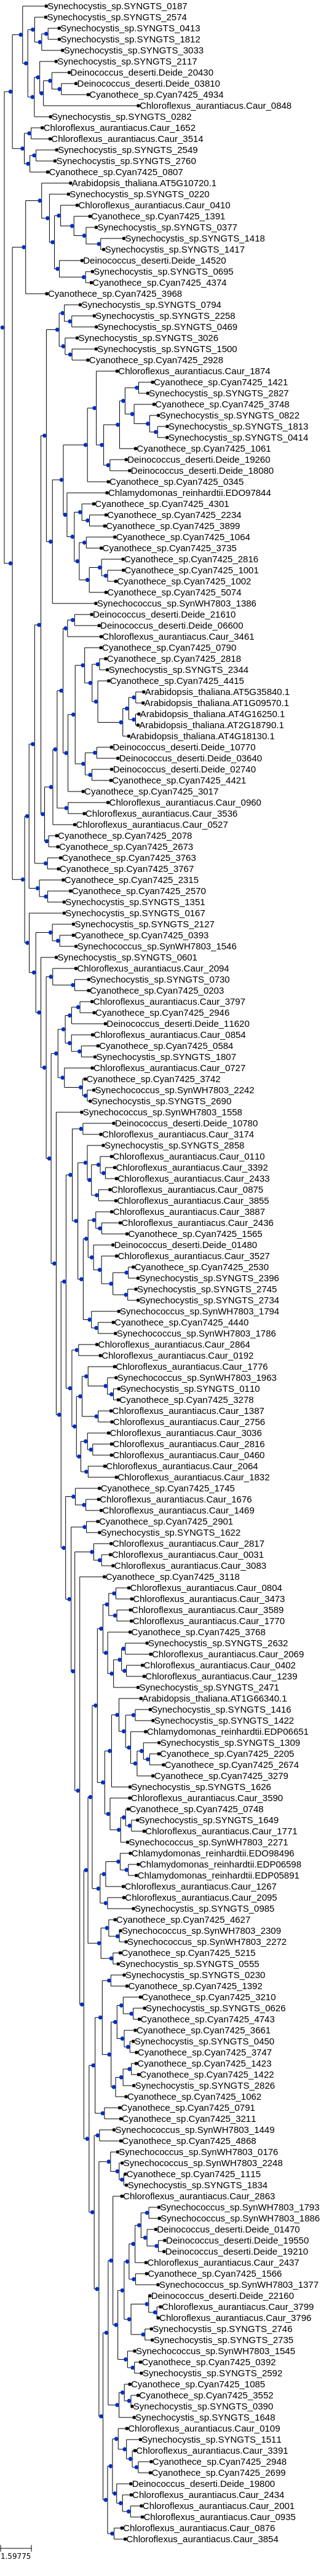

In [6]:
from ete3 import Tree

#I can generate a phylogeny for one specific cluster with this: 
genetree = PhyloTree('fasta_trees/fasta1.tree/clustalo_default-none-none-fasttree_full/Arabidopsis_thaliana.AT2G27070.1.fa.final_tree.nw')
#print(genetree)
genetree.render('%%inline')

genetree1 = PhyloTree('fasta_trees/fasta2.tree/clustalo_default-none-none-fasttree_full/Chloroflexus_aurantiacus.Caur_0189.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree1.render('%%inline')

genetree2 = PhyloTree('fasta_trees/fasta3.tree/clustalo_default-none-none-fasttree_full/Cyanothece_sp.Cyan7425_3552.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree2.render('%%inline')



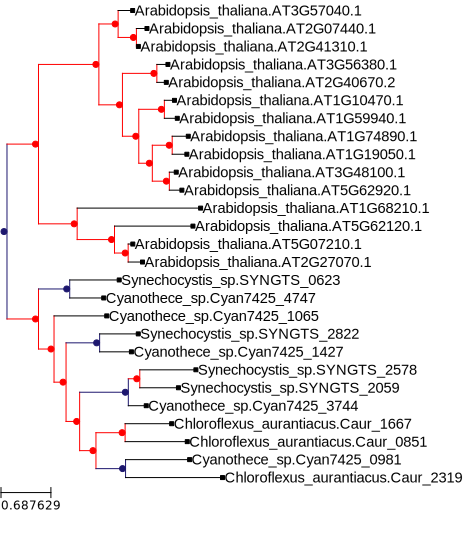

In [9]:
#Then, I can do reconciliation of the gene tree 
#(The function reconcile is going to find the only way to make gene tree topology compatible with the species tree. )
events = genetree.get_descendant_evol_events()
genetree.render("%%inlineSVG")

In [10]:
#Then, you can query for the specific events, such as speciation or duplication
#based on the reconciled tree
for node in genetree.get_descendants():
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        print side1, "are orthologs to", side2
        


['Synechocystis_sp.SYNGTS_0623'] are orthologs to ['Cyanothece_sp.Cyan7425_4747']
['Synechocystis_sp.SYNGTS_2822'] are orthologs to ['Cyanothece_sp.Cyan7425_1427']
['Synechocystis_sp.SYNGTS_2578', 'Synechocystis_sp.SYNGTS_2059'] are orthologs to ['Cyanothece_sp.Cyan7425_3744']
['Cyanothece_sp.Cyan7425_0981'] are orthologs to ['Chloroflexus_aurantiacus.Caur_2319']


In [3]:
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta1.tree/clustalo_default-none-none-fasttree_full/Arabidopsis_thaliana.AT2G27070.1.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()

        #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
        #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
       # for gene in side1+side2:
        #    if gene.startswith('Arabidopsis'):
         #       if "Synechocystis_sp" in node.get_species():
          #          print side1, "is orthologous to", side2


['Synechocystis_sp.SYNGTS_0623'] are orthologs to ['Cyanothece_sp.Cyan7425_4747']
['Synechocystis_sp.SYNGTS_2822'] are orthologs to ['Cyanothece_sp.Cyan7425_1427']
['Synechocystis_sp.SYNGTS_2578', 'Synechocystis_sp.SYNGTS_2059'] are orthologs to ['Cyanothece_sp.Cyan7425_3744']
['Cyanothece_sp.Cyan7425_0981'] are orthologs to ['Chloroflexus_aurantiacus.Caur_2319']


In [4]:
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta2.tree/clustalo_default-none-none-fasttree_full/Chloroflexus_aurantiacus.Caur_0189.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        print side1, "are orthologs to", side2

        #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
        #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
        #for gene in side1+side2:
         #   if gene.startswith('Arabidopsis'):
          #      if "Synechocystis_sp" in node.get_species():
           #         print side1, "is orthologous to", side2


['Synechocystis_sp.SYNGTS_0449', 'Synechocystis_sp.SYNGTS_0627', 'Cyanothece_sp.Cyan7425_4742'] are orthologs to ['Deinococcus_deserti.Deide_08380']
['Synechocystis_sp.SYNGTS_1510'] are orthologs to ['Cyanothece_sp.Cyan7425_2947']
['Cyanothece_sp.Cyan7425_3699'] are orthologs to ['Synechocystis_sp.SYNGTS_0480', 'Chloroflexus_aurantiacus.Caur_2815']
['Chloroflexus_aurantiacus.Caur_1833', 'Chloroflexus_aurantiacus.Caur_1529'] are orthologs to ['Cyanothece_sp.Cyan7425_4555']
['Synechocystis_sp.SYNGTS_0627'] are orthologs to ['Cyanothece_sp.Cyan7425_4742']
['Deinococcus_deserti.Deide_14480'] are orthologs to ['Chloroflexus_aurantiacus.Caur_3798', 'Chloroflexus_aurantiacus.Caur_1952']
['Synechocystis_sp.SYNGTS_0480'] are orthologs to ['Chloroflexus_aurantiacus.Caur_2815']
['Deinococcus_deserti.Deide_23490'] are orthologs to ['Synechocystis_sp.SYNGTS_2943', 'Cyanothece_sp.Cyan7425_0851', 'Chloroflexus_aurantiacus.Caur_3642']
['Chloroflexus_aurantiacus.Caur_0189', 'Chloroflexus_aurantiacus.Ca

In [62]:
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta3.tree/clustalo_default-none-none-fasttree_full/Cyanothece_sp.Cyan7425_3552.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        
        #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
        #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
        for gene in side1+side2:
            if gene.startswith('Arabidopsis'):
                if "Synechocystis_sp" in node.get_species():
                    print side1, "is orthologous to", side2, "\n"


['Arabidopsis_thaliana.AT5G10720.1'] is orthologous to ['Synechocystis_sp.SYNGTS_0220', 'Chloroflexus_aurantiacus.Caur_0410', 'Cyanothece_sp.Cyan7425_1391', 'Synechocystis_sp.SYNGTS_0377', 'Synechocystis_sp.SYNGTS_1418', 'Synechocystis_sp.SYNGTS_1417', 'Deinococcus_deserti.Deide_14520', 'Synechocystis_sp.SYNGTS_0695', 'Cyanothece_sp.Cyan7425_4374'] 

['Arabidopsis_thaliana.AT1G66340.1'] is orthologous to ['Synechocystis_sp.SYNGTS_1416', 'Synechocystis_sp.SYNGTS_1422', 'Chlamydomonas_reinhardtii.EDP06651', 'Synechocystis_sp.SYNGTS_1309', 'Cyanothece_sp.Cyan7425_2205', 'Cyanothece_sp.Cyan7425_2674', 'Cyanothece_sp.Cyan7425_3279'] 



In [36]:
#Method 2 (same but like the teacher did)
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta1.tree/clustalo_default-none-none-fasttree_full/Arabidopsis_thaliana.AT2G27070.1.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        
        #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
        #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
        target_genes = []
        for gene in side1+side2:
            if gene.startswith('Synechocystis_sp') or gene.startswith('Arabidopsis'):
                target_genes.append(gene)
                print ','.join(target_genes), "\n"
                #print side1, side2

Synechocystis_sp.SYNGTS_0623 

Synechocystis_sp.SYNGTS_2822 

Synechocystis_sp.SYNGTS_2578 

Synechocystis_sp.SYNGTS_2578,Synechocystis_sp.SYNGTS_2059 



In [37]:
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta2.tree/clustalo_default-none-none-fasttree_full/Chloroflexus_aurantiacus.Caur_0189.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        
        target_genes = []
        for gene in side1+side2:
            if gene.startswith('Synechocystis_sp') or gene.startswith('Arabidopsis'):
                target_genes.append(gene)
                print ','.join(target_genes), "\n"
                #print side1, side2


Synechocystis_sp.SYNGTS_0449 

Synechocystis_sp.SYNGTS_0449,Synechocystis_sp.SYNGTS_0627 

Synechocystis_sp.SYNGTS_1510 

Synechocystis_sp.SYNGTS_0480 

Synechocystis_sp.SYNGTS_0627 

Synechocystis_sp.SYNGTS_0480 

Synechocystis_sp.SYNGTS_2943 

Synechocystis_sp.SYNGTS_2706 

Synechocystis_sp.SYNGTS_2706,Synechocystis_sp.SYNGTS_1184 

Synechocystis_sp.SYNGTS_2943 

Synechocystis_sp.SYNGTS_2719 

Synechocystis_sp.SYNGTS_2706 

Synechocystis_sp.SYNGTS_2706,Synechocystis_sp.SYNGTS_1184 

Synechocystis_sp.SYNGTS_2943 

Synechocystis_sp.SYNGTS_3029 

Synechocystis_sp.SYNGTS_0870 

Synechocystis_sp.SYNGTS_2719 

Synechocystis_sp.SYNGTS_2412 

Synechocystis_sp.SYNGTS_1196 

Synechocystis_sp.SYNGTS_2412 

Synechocystis_sp.SYNGTS_1196 

Synechocystis_sp.SYNGTS_1196 

Synechocystis_sp.SYNGTS_1196 



In [39]:
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta3.tree/clustalo_default-none-none-fasttree_full/Cyanothece_sp.Cyan7425_3552.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        
        target_genes = []
        for gene in side1+side2:
            if gene.startswith('Synechocystis_sp') or gene.startswith('Arabidopsis'):
                target_genes.append(gene)
                print ','.join(target_genes), "\n"
                #print side1, side2


Synechocystis_sp.SYNGTS_2549 

Synechocystis_sp.SYNGTS_2549,Synechocystis_sp.SYNGTS_2760 

Synechocystis_sp.SYNGTS_2549 

Synechocystis_sp.SYNGTS_2549,Synechocystis_sp.SYNGTS_2760 

Arabidopsis_thaliana.AT5G10720.1 

Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220 

Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377 

Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418 

Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418,Synechocystis_sp.SYNGTS_1417 

Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418,Synechocystis_sp.SYNGTS_1417,Synechocystis_sp.SYNGTS_0695 

Synechocystis_sp.SYNGTS_2117 

Synechocystis_sp.SYNGTS_1351 

Synechocystis_sp.SYNGTS_2127 

Synechocystis_sp.SYNGTS_0377 

Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYN

In [66]:
#Same but loop it (build a tree and reconcile it)
from glob import glob
for tree in glob('fasta*/clustalo_default-none-none-fasttree_full/*.nw'):
    genetree = PhyloTree(tree)
    genetree.render('%%inline')

    events = genetree.get_descendant_evol_events()
    genetree.render("%%inlineSVG")
    
    for node in genetree.get_descendants():
        if not node.is_leaf() and node.evoltype == "S": 
            side1 = node.children[0].get_leaf_names()
            side2 = node.children[1].get_leaf_names()
            
            target_genes = []
            for gene in side1+side2:
                if gene.startswith('Synechocystis_sp') or gene.startswith('Arabidopsis_thaliana'):
                    target_genes.append(gene)
                    print ','.join(target_genes)

Synechocystis_sp.SYNGTS_2549
Synechocystis_sp.SYNGTS_2549,Synechocystis_sp.SYNGTS_2760
Synechocystis_sp.SYNGTS_2549
Synechocystis_sp.SYNGTS_2549,Synechocystis_sp.SYNGTS_2760
Arabidopsis_thaliana.AT5G10720.1
Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220
Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377
Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418
Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418,Synechocystis_sp.SYNGTS_1417
Arabidopsis_thaliana.AT5G10720.1,Synechocystis_sp.SYNGTS_0220,Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418,Synechocystis_sp.SYNGTS_1417,Synechocystis_sp.SYNGTS_0695
Synechocystis_sp.SYNGTS_2117
Synechocystis_sp.SYNGTS_1351
Synechocystis_sp.SYNGTS_0377
Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SYNGTS_1418
Synechocystis_sp.SYNGTS_0377,Synechocystis_sp.SY

In [111]:
from glob import glob


def Synechocystis_sp(node):
    return node.name.split(".")[0]

for tree in glob('fasta*/clustalo_default-none-none-fasttree_full/*.nw'):

    
    #Then, I do the tree and reconciliation
    genetree = PhyloTree(tree, sp_naming_function=Synechocystis_sp)
    genetree.standardize() 
    events = genetree.get_descendant_evol_events()
    all_spcs = set()

    #Then I search for speciation events
    for node in genetree.get_descendants():
        node.name.split(".")[0]
        if not node.is_leaf() and node.evoltype == "S": 
            side1 = node.children[0].get_leaf_names()
            side2 = node.children[1].get_leaf_names()

            #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
            #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
            for gene in side1+side2:
                if gene.startswith('Arabidopsis_thaliana'):
                    if "Synechocystis_sp" in node.get_species():
                         print (side1, "is orthologous to", side2)
                        

['Arabidopsis_thaliana.AT5G10720.1'] is orthologous to ['Synechocystis_sp.SYNGTS_0220', 'Chloroflexus_aurantiacus.Caur_0410', 'Cyanothece_sp.Cyan7425_1391', 'Synechocystis_sp.SYNGTS_0377', 'Synechocystis_sp.SYNGTS_1418', 'Synechocystis_sp.SYNGTS_1417', 'Deinococcus_deserti.Deide_14520', 'Synechocystis_sp.SYNGTS_0695', 'Cyanothece_sp.Cyan7425_4374']
['Arabidopsis_thaliana.AT1G66340.1'] is orthologous to ['Synechocystis_sp.SYNGTS_1416', 'Synechocystis_sp.SYNGTS_1422', 'Chlamydomonas_reinhardtii.EDP06651', 'Synechocystis_sp.SYNGTS_1309', 'Cyanothece_sp.Cyan7425_2205', 'Cyanothece_sp.Cyan7425_2674', 'Cyanothece_sp.Cyan7425_3279']


In [41]:
#Something different
#And you also can find orthologues between two species (ex Synechocystis and Arabidopsis)

#First, I define the name of the Bacteria we are working with (its everything left of the ".")
def Synechocystis_sp(node):
    return node.name.split(".")[0]

#Then, I do the tree and reconciliation
genetree = PhyloTree('fasta_trees/fasta2.tree/clustalo_default-none-none-fasttree_full/Chloroflexus_aurantiacus.Caur_0189.fa.final_tree.nw', sp_naming_function=Synechocystis_sp)
genetree.standardize() 
events = genetree.get_descendant_evol_events()
all_spcs = set()

#Then I search for speciation events
for node in genetree.get_descendants():
    node.name.split(".")[0]
    if not node.is_leaf() and node.evoltype == "S": 
        side1 = node.children[0].get_leaf_names()
        side2 = node.children[1].get_leaf_names()
        
        #Then I say, its mandatory that the target specie (Arabidopsis) appears in one of the sides
        #And also the query specie has to be the bacteria we are working with (If I dont do it, it also will work but with very redudndant results)
        for gene in side1+side2:
            if gene.startswith('Synechocystis_sp.SYNGTS_0480') or gene.startswith('Synechocystis_sp.SYNGTS_1416'):
                target_genes.append(gene)
                print ','.join(target_genes), "\n"
                #print side1, side2

Synechocystis_sp.SYNGTS_0449,Synechocystis_sp.SYNGTS_0627,Synechocystis_sp.SYNGTS_1510,Synechocystis_sp.SYNGTS_0480,Synechocystis_sp.SYNGTS_0627,Synechocystis_sp.SYNGTS_0480,Synechocystis_sp.SYNGTS_2943,Synechocystis_sp.SYNGTS_2706,Synechocystis_sp.SYNGTS_1184,Synechocystis_sp.SYNGTS_2943,Synechocystis_sp.SYNGTS_2719,Synechocystis_sp.SYNGTS_2706,Synechocystis_sp.SYNGTS_1184,Synechocystis_sp.SYNGTS_2943,Synechocystis_sp.SYNGTS_3029,Synechocystis_sp.SYNGTS_0870,Synechocystis_sp.SYNGTS_2719,Synechocystis_sp.SYNGTS_2412,Synechocystis_sp.SYNGTS_1196,Synechocystis_sp.SYNGTS_2412,Synechocystis_sp.SYNGTS_1196,Synechocystis_sp.SYNGTS_1196,Synechocystis_sp.SYNGTS_1196,Synechocystis_sp.SYNGTS_0480 

Synechocystis_sp.SYNGTS_0449,Synechocystis_sp.SYNGTS_0627,Synechocystis_sp.SYNGTS_1510,Synechocystis_sp.SYNGTS_0480,Synechocystis_sp.SYNGTS_0627,Synechocystis_sp.SYNGTS_0480,Synechocystis_sp.SYNGTS_2943,Synechocystis_sp.SYNGTS_2706,Synechocystis_sp.SYNGTS_1184,Synechocystis_sp.SYNGTS_2943,Synechocysti

In [64]:
from ete3 import Tree
from ete3 import PhyloTree

from glob import glob

def rodent_name(node):
    return node.name.split('.')[0]

for treefile in glob('fasta_trees/fasta*.tree/clustalo_default-none-none-fasttree_full/*.nw'):

    # load tree and call relaxed reconciliation
    tree = PhyloTree(treefile, sp_naming_function=rodent_name)
    events = tree.get_descendant_evol_events()
    
    # traverse the tree to look for speciation nodes\
    all_spcs = set()
    for node in tree.traverse():
        if not node.is_leaf() and node.evoltype == 'S':
            # collect all orthologous genes from all species
            side1 = node.children[0].get_leaf_names()
            side2 = node.children[1].get_leaf_names()    
            # filter genes from our two species, and print them all
            target_genes = []
            for gene in side1+side2:
                if gene.startswith('Synechocystis_sp.SYNGTS_0480') or gene.startswith('Arabidopsis_thaliana'):
                    target_genes.append(gene)
                    print ','.join(target_genes), "\n"
                    #print side1, side2

Arabidopsis_thaliana.AT5G10720.1 

Arabidopsis_thaliana.AT5G35840.1 

Arabidopsis_thaliana.AT5G35840.1,Arabidopsis_thaliana.AT1G09570.1 

Arabidopsis_thaliana.AT5G35840.1,Arabidopsis_thaliana.AT1G09570.1,Arabidopsis_thaliana.AT4G16250.1 

Arabidopsis_thaliana.AT5G35840.1,Arabidopsis_thaliana.AT1G09570.1,Arabidopsis_thaliana.AT4G16250.1,Arabidopsis_thaliana.AT2G18790.1 

Arabidopsis_thaliana.AT5G35840.1,Arabidopsis_thaliana.AT1G09570.1,Arabidopsis_thaliana.AT4G16250.1,Arabidopsis_thaliana.AT2G18790.1,Arabidopsis_thaliana.AT4G18130.1 

Arabidopsis_thaliana.AT1G66340.1 

Arabidopsis_thaliana.AT3G57040.1 

Arabidopsis_thaliana.AT3G57040.1,Arabidopsis_thaliana.AT2G07440.1 

Arabidopsis_thaliana.AT3G57040.1,Arabidopsis_thaliana.AT2G07440.1,Arabidopsis_thaliana.AT2G41310.1 

Arabidopsis_thaliana.AT3G57040.1,Arabidopsis_thaliana.AT2G07440.1,Arabidopsis_thaliana.AT2G41310.1,Arabidopsis_thaliana.AT3G56380.1 

Arabidopsis_thaliana.AT3G57040.1,Arabidopsis_thaliana.AT2G07440.1,Arabidopsis_thaliana.